In [ ]:
!pip install scipy matplotlib numpy pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
from scipy.fftpack import fft
import soundfile as sf

audio_file, fs = sf.read("/WhatsApp Audio 2023-02-27 at 16.47.51 (1).ogg")
audio_file1 = AudioSegment.from_ogg("/WhatsApp Audio 2023-02-27 at 16.47.51.ogg")

In [ ]:
duration = len(audio_file) / fs

In [ ]:
t = np.linspace(0, duration, len(audio_file))

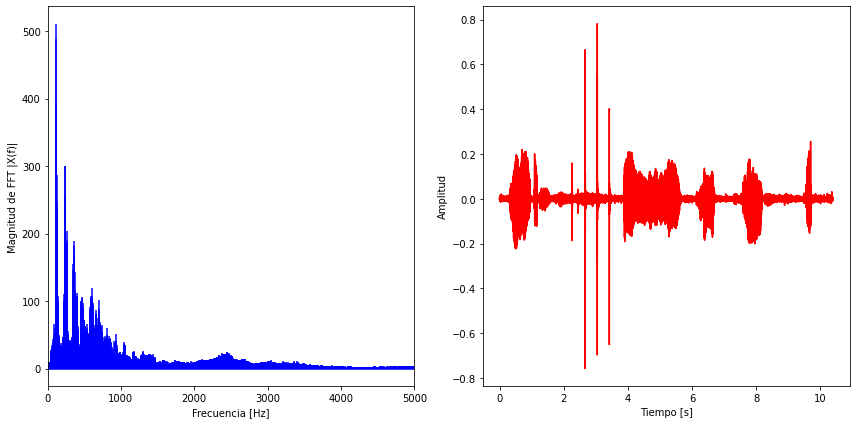

In [ ]:
from numpy.fft import fft, ifft
X = np.fft.fft(audio_file)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud de FFT |X(f)|')
plt.xlim(0, 5000)

# Grafica la señal en el dominio del tiempo
plt.subplot(122)
plt.plot(t, audio_file, 'r')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [ ]:
# Convierte el audio a formato numpy array
data = np.array(audio_file1.get_array_of_samples())

In [ ]:
# Obtiene la tasa de muestreo del audio
fs = audio_file1.frame_rate

In [ ]:
# Calcula la FFT de la señal
fft_data = fft(data)

In [ ]:
# Calcula las frecuencias correspondientes a las componentes de la FFT
freqs = np.arange(len(fft_data)) * fs / len(fft_data)

Text(0, 0.5, 'Amplitud')

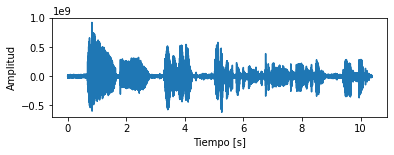

In [ ]:
# Grafica la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(data)) / float(fs), data)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

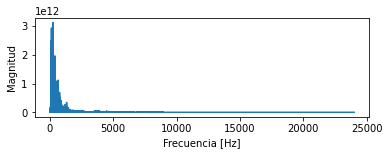

In [ ]:
# Grafica la señal en el dominio de la frecuencia
plt.subplot(2, 1, 2)
plt.plot(freqs[:len(fft_data)//2], np.abs(fft_data[:len(fft_data)//2]))
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.show()

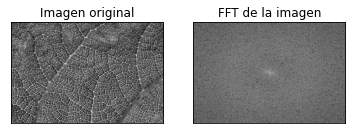

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# cargar imagen en escala de grises
im = Image.open('image.jfif').convert('L')
im = np.array(im)

# aplicar FFT
im_fft = np.fft.fft2(im)

# desplazar el componente de frecuencia cero al centro del espectro
im_fft_shift = np.fft.fftshift(im_fft)

# visualizar imagen original y transformada
plt.subplot(121),plt.imshow(im, cmap = 'gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(1+np.abs(im_fft_shift)), cmap = 'gray')
plt.title('FFT de la imagen'), plt.xticks([]), plt.yticks([])
plt.show()


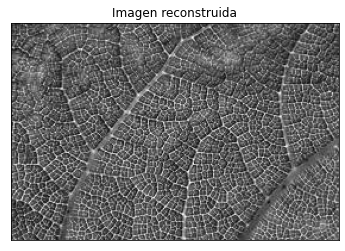

In [ ]:
# calcular la inversa de la FFT
im_recon = np.fft.ifft2(np.fft.ifftshift(im_fft_shift))

# visualizar imagen reconstruida
plt.imshow(np.abs(im_recon), cmap = 'gray')
plt.title('Imagen reconstruida'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
im_fft == im_recon

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

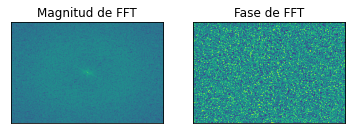

In [ ]:
# desplazar el componente de frecuencia cero al centro del espectro
im_fft_shift = np.fft.fftshift(im_fft)

# obtener la magnitud y la fase de la FFT
im_fft_mag = np.abs(im_fft_shift)
im_fft_phase = np.angle(im_fft_shift)

# visualizar la magnitud y la fase de la FFT
plt.subplot(121),plt.imshow(np.log(1+im_fft_mag))
plt.title('Magnitud de FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_fft_phase)
plt.title('Fase de FFT'), plt.xticks([]), plt.yticks([])
plt.show()

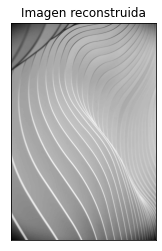

In [ ]:
# calcular la inversa de la FFT
im_recon = np.fft.ifft2(np.fft.ifftshift(im_fft_shift))

# visualizar imagen reconstruida
plt.imshow(np.abs(im_recon), cmap = 'gray')
plt.title('Imagen reconstruida'), plt.xticks([]), plt.yticks([])
plt.show()

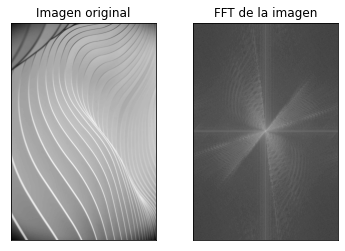

In [ ]:

# cargar imagen en escala de grises
im2 = Image.open('image.jfif').convert('L')
im2 = np.array(im)

# aplicar FFT
im_fft2 = np.fft.fft2(im2)

# desplazar el componente de frecuencia cero al centro del espectro
im_fft_shift2 = np.fft.fftshift(im_fft2)

# visualizar imagen original y transformada
plt.subplot(121),plt.imshow(im2, cmap = 'gray')
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(np.log(1+np.abs(im_fft_shift2)), cmap = 'gray')
plt.title('FFT de la imagen'), plt.xticks([]), plt.yticks([])
plt.show() 

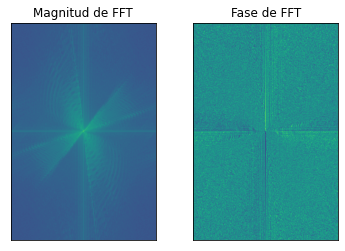

In [ ]:
# desplazar el componente de frecuencia cero al centro del espectro
im_fft_shift2 = np.fft.fftshift(im_fft2)

# obtener la magnitud y la fase de la FFT
im_fft_mag2 = np.abs(im_fft_shift2)
im_fft_phase2 = np.angle(im_fft_shift2)

# visualizar la magnitud y la fase de la FFT
plt.subplot(121),plt.imshow(np.log(1+im_fft_mag2))
plt.title('Magnitud de FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_fft_phase2)
plt.title('Fase de FFT'), plt.xticks([]), plt.yticks([])
plt.show()